# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Inserm</span>

Après réception du fichier csv contenant la liste de DOI enrichie (ajout du titre, des auteurs, de l'année, du statut open access...) de la part du MESRI, les graphiques peuvent être générés directement depuis le Baromètre national (voir le mode d'emploi sur la partie "déclinaisons locales" du site web du BSO national).  
Néanmoins, à partir de ce fichier, certains graphiques réalisés pour le Baromètre Inserm peuvent toujours être générés et mis à jour en suivant ce code.  
Il suffit de remplacer "inserm" par le nom de son établissement à l'intérieur du code.

Les résultats obtenus ici sont le reflet de la situation d'ouverture des publications en décembre 2022, date à laquelle les dernières extractions ont été réalisées.  
Le Baromètre national et, par extension, ses déclinaisons locales depuis le portail national, étant mis à jour régulièrement, les taux affichés sur les graphiques ci-dessous sont obsolètes.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

On commence par lire le fichier enrichi envoyé par le MESRI. Seuls les DOI présents dans Crossref sont traités, il se peut donc que le nombre de publications présentes dans ce tableau soit inférieur au nombre de DOI rassemblés à la fin du notebook "nettoyage_donnees".

In [2]:
df_complete = pd.read_csv("Data/raw/bso-publications-latest_180036048_enriched.csv", sep=";")

In [3]:
df_complete.columns

Index(['observation_date', 'id', 'doi', 'pmid', 'hal_id', 'year', 'title',
       'journal_issns', 'journal_issn_l', 'journal_name', 'publisher',
       'publisher_dissemination', 'bso_classification', 'lang', 'genre',
       'amount_apc_EUR', 'apc_source', 'domains', 'detected_countries',
       'bso_local_affiliations', 'rors', 'funding_anr', 'funding_europe',
       'bsso_classification', 'is_oa', 'is_oa_hal', 'oa_host_type',
       'journal_is_in_doaj', 'journal_is_oa', 'unpaywall_oa_status',
       'oa_colors', 'licence_publisher', 'licence_repositories',
       'repositories', 'software_mentions', 'data_mentions', 'software_used',
       'software_created', 'software_shared', 'data_used', 'data_created',
       'data_shared', 'bso_country'],
      dtype='object')

In [4]:
df_complete

,observation_date,id,doi,pmid,hal_id,year,title,journal_issns,journal_issn_l,journal_name,...,repositories,software_mentions,data_mentions,software_used,software_created,software_shared,data_used,data_created,data_shared,bso_country
0,2023Q4,doi10.1016/s0959-8049(16)32649-1,10.1016/s0959-8049(16)32649-1,NaN,NaN,2016,HOXA9 transcription factor as a target in acut...,0959-8049,0959-8049,European Journal of Cancer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
1,2023Q4,doi10.1016/j.jval.2016.09.172,10.1016/j.jval.2016.09.172,NaN,NaN,2016,How are Adverse Effects Incorporated in Cost-E...,1098-3015,1098-3015,Value in Health,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
2,2023Q4,doi10.1093/annonc/mdw392.33,10.1093/annonc/mdw392.33,NaN,NaN,2016,Toward therapeutic drug monitoring of everolim...,0923-7534,0923-7534,Annals of Oncology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
3,2023Q4,doi10.3109/09687637.2016.1153603,10.3109/09687637.2016.1153603,NaN,NaN,2016,Effectiveness of formalised therapy for adoles...,"0968-7637,1465-3370",0968-7637,"Drugs: Education, Prevention and Policy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
4,2023Q4,doi10.1016/s0924-977x(16)31406-7,10.1016/s0924-977x(16)31406-7,NaN,NaN,2016,Cognitive mechanisms of racing thoughts in bip...,0924-977X,0924-977X,European Neuropsychopharmacology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135121,2023Q4,doi10.3390/cancers13143518,10.3390/cancers13143518,NaN,hal-03553345,2021,The Prostate Cancer Therapy Enzalutamide Compa...,2072-6694,2072-6694,Cancers,...,PubMed Central|bioRxiv,GraphPad Prism|Python|Chainer|Windows|AnyMaze|...,learning plasticity|Behavior of an- imals|Depr...,True,True,False,True,False,False,fr|other
135122,2023Q4,doi10.1186/s13072-021-00410-x,10.1186/s13072-021-00410-x,NaN,hal-03336457,2021,Epigenetic rewriting at centromeric DNA repeat...,1756-8935,1756-8935,"Epigenetics &amp, Chromatin",...,HAL|PubMed Central|bioRxiv,TANGO|Tools for Anal- ysis of|Spot Segmenter|I...,FISH images|Cells|Hybridization|Quality of seg...,True,False,False,True,False,False,fr|other
135123,2023Q4,doi10.1371/journal.ppat.1009427,10.1371/journal.ppat.1009427,NaN,anses-03387992,2021,Intranasal type I interferon treatment is bene...,1553-7374,1553-7366,PLOS Pathogens,...,HAL|PubMed Central|bioRxiv,Xponent|NDP.view2|GraphPad Prism|MagPix,complete blood count|percentages of|Cytokine/C...,True,False,False,True,True,False,fr|other
135124,2023Q4,doi10.1016/j.cmi.2020.03.020,10.1016/j.cmi.2020.03.020,NaN,NaN,2020,Molecular characterization of SARS-CoV-2 in th...,1198-743X,1198-743X,Clinical Microbiology and Infection,...,PubMed Central|bioRxiv,BWA-MEM,-19 resource centre|nasopharyngeal swab|Geneti...,True,False,False,True,False,True,fr|other


## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### Proportion des publications 2022 en accès ouvert (mesuré en décembre 2023)

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2022 et les isoler dans la variable "pie_data".  
**Bien que ce calcul soit réalisé en décembre 2023, il est plus pertinent d'utiliser les données 2022 que les données 2023 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en décembre 2023 la réelle ouverture des publications de l'année précédente.**

**<span style="color:red">Dans la variable "annee" mettre la dernière année à traiter, par exemple pour le fichier enrichie recu fin 2023, on se limite aux publications de 2022</span>**

In [5]:
annee = 2022

Isoler l'année à traiter :

In [6]:
pie_data = df_complete.loc[df_complete['year'] == annee, :]
pie_data.shape

(20735, 43)

Définir les deux niveaux dans le graphique : accès ouvert ou non (variable "oa_yes_no"), type d'accès ouvert (variable "type_oa") :

In [7]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index()
oa_yes_no = oa_yes_no.rename({False: 'Accès fermé global', True: 'Accès ouvert global'})
oa_yes_no

is_oa
Accès fermé global      4025
Accès ouvert global    16710
Name: count, dtype: int64

In [8]:
type_oa = pie_data["oa_host_type"].value_counts().sort_index()
type_oa = type_oa.rename(
    {
        "closed": "Accès fermé",
        "publisher": "Editeur",
        "publisher-repository": "Editeur & Archive ouverte",
        "repository": "Archive ouverte",
    }
)
type_oa

oa_host_type
Accès fermé                   4025
Editeur                       2597
Editeur & Archive ouverte    11219
Archive ouverte               2894
Name: count, dtype: int64

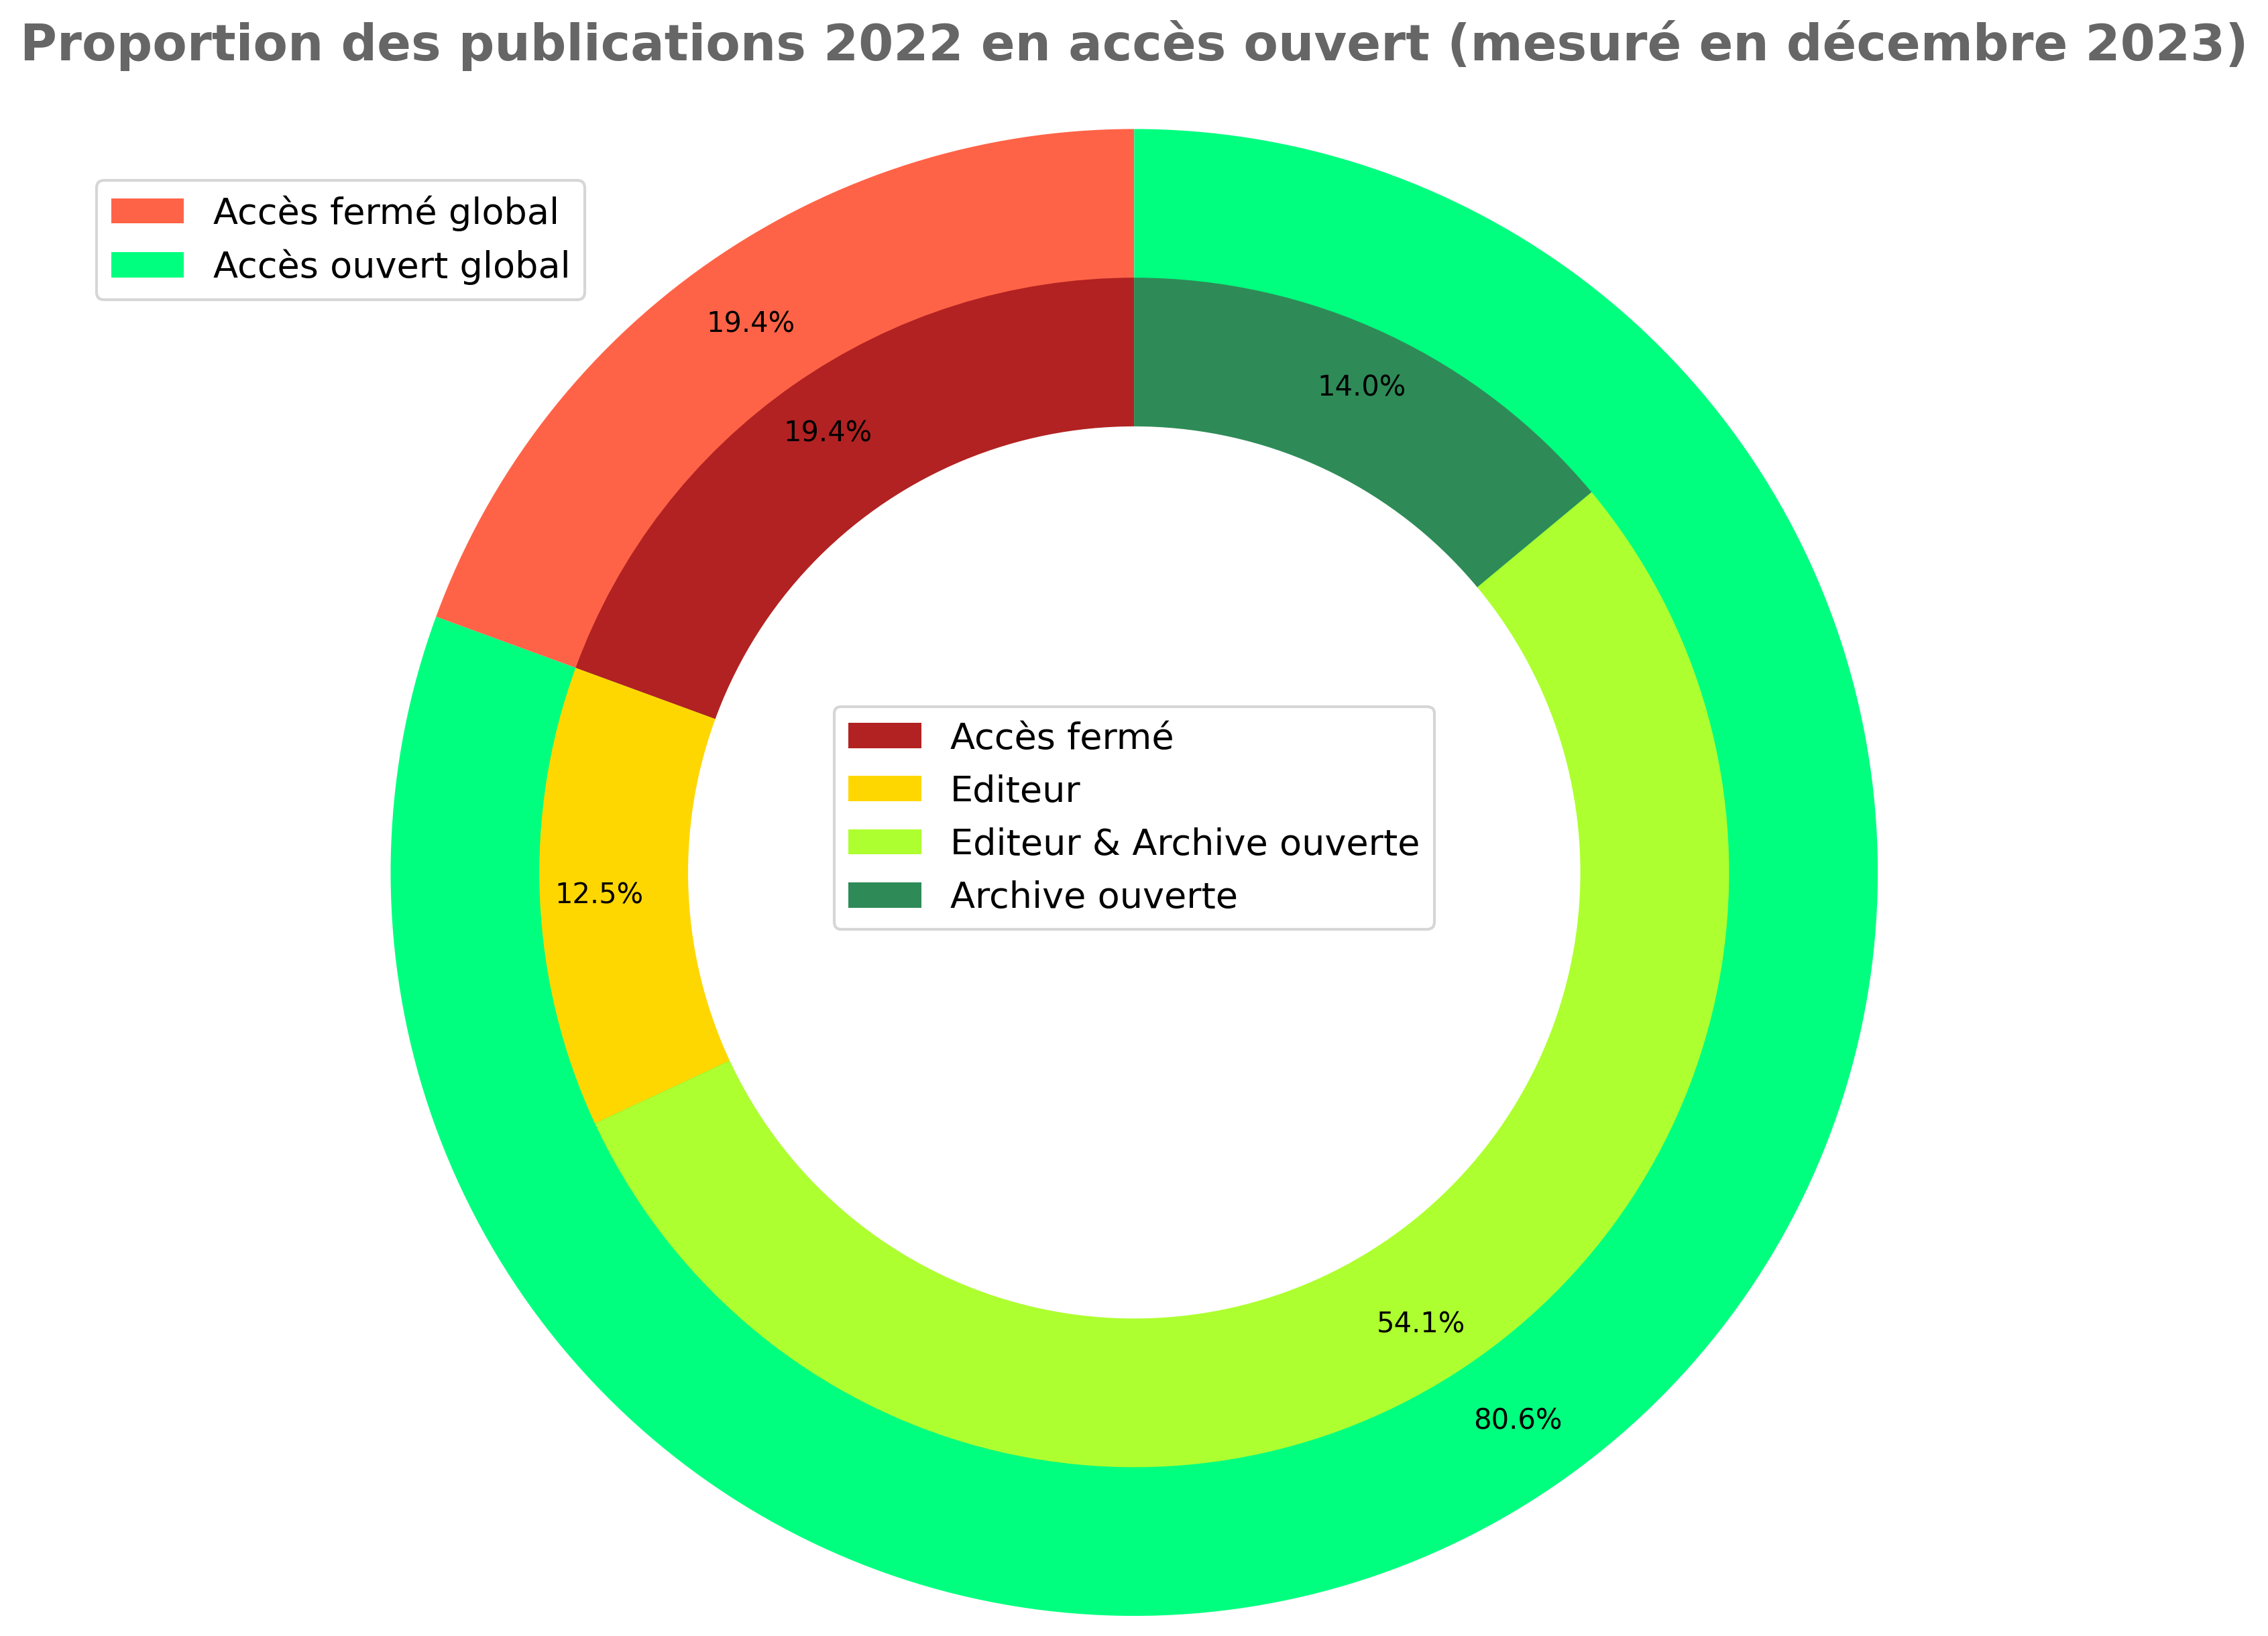

In [9]:
fig, ax = plt.subplots(dpi=300)

# Cercle extérieur
slices_ext, legend_labels_ext, pct_labels_ext = ax.pie(
    oa_yes_no,
    radius = 2.5,
    labeldistance = None,
    colors = ["tomato", "springgreen"],
    autopct = lambda x: str(round(x, 1)) + "%",
    pctdistance = 0.9,
    startangle = 90,
)

# Cercle intérieur
slices_int, legend_labels_int, pct_labels_int = ax.pie(
    type_oa,
    radius = 2,
    labeldistance = None,
    colors = ["firebrick", "gold", "greenyellow", "seagreen"],
    autopct = lambda x: str(round(x, 1)) + "%",
    pctdistance = 0.9,
    startangle = 90,
)

# Cercle intérieur blanc
ax.pie([1], radius=1.5, colors="white")

# Legende extérieur
legende_ext = plt.legend(
    slices_ext, 
    oa_yes_no.index,
    fontsize = 13,
    bbox_to_anchor = (0.1, 1.15), 
    loc="center right", 
    bbox_transform=plt.gcf().transFigure
)

# Legende intérieur (la légende est ajoutée à la figure et non au plot, sinon la légende précedente est écrasée)
legende_int = fig.legend(
    slices_int,
    type_oa.index,
    fontsize = 13,
    loc="center",
)

# Titre
plt.title(
    f"Proportion des publications {annee} en accès ouvert (mesuré en décembre {annee+1})",
    fontsize = 18,
#     x=0.55,
    y = 1.57,
    fontweight="bold",
    alpha=0.6,
)

plt.show()

# Exporter l'image
# plt.savefig(f'Data/outputs/{annee}_proportion_publications_oa.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Il peut être intéressant d'identifier les publications publiées uniquement en accès ouvert "Editeur", pour ensuite déposer ces publications dans une archive ouverte.  
Pour cela, saisir le code ci-dessous :

In [10]:
publications_ouvertes_editeurs = pie_data.loc[(pie_data['oa_host_type'] == 'publisher')]
publications_ouvertes_editeurs

,observation_date,id,doi,pmid,hal_id,year,title,journal_issns,journal_issn_l,journal_name,...,repositories,software_mentions,data_mentions,software_used,software_created,software_shared,data_used,data_created,data_shared,bso_country
232,2023Q4,doi10.3917/spub.215.0627,10.3917/spub.215.0627,NaN,NaN,2022,Violences dites « gynécologiques et obstétrica...,0995-3914,0995-3914,Santé Publique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
297,2023Q4,doi10.1242/dmm.049964,10.1242/dmm.049964,NaN,NaN,2022,First person – Arnaud Duchon,"1754-8403,1754-8411",1754-8403,"Disease Models &amp, Mechanisms",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
298,2023Q4,doi10.20452/pamw.16363,10.20452/pamw.16363,NaN,NaN,2022,Cystinosis: a rare multisystem disease,1897-9483,0032-3772,Polish Archives of Internal Medicine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
308,2023Q4,doi10.31083/j.rcm2310351,10.31083/j.rcm2310351,NaN,NaN,2022,Mechanisms and Definitions of Periprocedural M...,1530-6550,1530-6550,Reviews in Cardiovascular Medicine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
312,2023Q4,doi10.1053/j.gastro.2022.07.078,10.1053/j.gastro.2022.07.078,NaN,NaN,2022,Needle-free Nonalcoholic Fatty Liver Disease P...,0016-5085,0016-5085,Gastroenterology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124192,2023Q4,doi10.1016/j.gofs.2021.06.002,10.1016/j.gofs.2021.06.002,NaN,hal-03475122,2022,Intérêt de la théorie des organisations à haut...,2468-7189,2468-7189,"Gynécologie Obstétrique Fertilité &amp, Sénologie",...,NaN,NaN,Specific interviews,False,False,False,True,False,False,fr|other
125135,2023Q4,doi10.1016/j.encep.2021.02.015,10.1016/j.encep.2021.02.015,NaN,NaN,2022,Mindfulness-based relapse prevention for canna...,0013-7006,0013-7006,L'Encéphale,...,NaN,SPSS Statistics,Cannabis users|average|average number of joint...,True,False,False,True,True,False,fr|other
126228,2023Q4,doi10.18176/jiaci.0707,10.18176/jiaci.0707,NaN,hal-03654357,2022,Immediate Hypersensitivity to Mealworm and Cri...,1018-9068,1018-9068,Journal of Investigational Allergy and Clinica...,...,NaN,NaN,NaN,False,False,False,False,False,False,fr|other
127611,2023Q4,doi10.1016/j.rehab.2020.07.012,10.1016/j.rehab.2020.07.012,NaN,NaN,2022,Machine learning analyses can be of interest t...,1877-0657,1877-0657,Annals of Physical and Rehabilitation Medicine,...,NaN,JASP|JASP Team,Elsevier|data,False,False,False,False,True,True,fr|other


**Nécessite d'avoir le package "openpyxl" installé pour écrire vers un fichier "xlsx"**

In [11]:
publications_ouvertes_editeurs.to_excel("Data/outputs/publications_ouvertes_editeurs.xlsx", index=False)

### Etude plus poussée des données

**Suite à l'ajout des champs "unpaywall_oa_status" et "oa_colors" dans le fichier enrichie, ce traitement est problablement obsolète.** 
Il est conseillé d'exploiter ces nouveaux champs plutôt.

On souhaite notamment discerner le status Gold

In [12]:
oa_no = (pie_data['is_oa'] == False)
oa_yes = (pie_data['is_oa'] == True)
assert(len(pie_data) == sum(oa_no) + sum(oa_yes))

Si dans le doaj alors gold.

In [13]:
gold = (pie_data['journal_is_in_doaj'] == True)

Si oa et pas gold alors free.

In [14]:
free = oa_yes & (pie_data['journal_is_in_doaj'] == False)

In [15]:
assert(len(pie_data) == sum(oa_no) + sum(gold) + sum(free))

In [16]:
print(f"Acces fermé: {sum(oa_no)/len(pie_data):.2%}\nGold: {sum(gold)/len(pie_data):.2%}\nFree {sum(free)/len(pie_data):.2%}")

Acces fermé: 19.41%
Gold: 38.50%
Free 42.09%


**Free** se décompose en **"Libre éditeur"** + **"Archives ouvertes"**  
* "Libre éditeur" = "publisher" + "publisher-repository"  
* "Archives ouvertes" = "repository" seulement

In [17]:
libre_editeur =  free & ((pie_data['oa_host_type'] == 'publisher') | (pie_data['oa_host_type'] == 'publisher-repository'))

In [18]:
archive_ouverte = free & (pie_data['oa_host_type'] == 'repository')

In [19]:
assert(sum(free) == sum(libre_editeur) + sum(archive_ouverte))

In [20]:
pie_data_ext = pd.DataFrame(
    {
        "oa_no": oa_no,
        "gold": gold,
        "libre_editeur": libre_editeur,
        "archive_ouverte": archive_ouverte,
    }
)
pie_data_ext

,oa_no,gold,libre_editeur,archive_ouverte
232,False,False,True,False
251,False,False,True,False
270,True,False,False,False
291,True,False,False,False
292,True,False,False,False
...,...,...,...,...
132975,False,False,False,True
133379,False,False,False,True
133444,False,False,False,True
133849,False,False,False,True


#### A partir des masques que l'on vient d'élaborer, on veut obtenir un "type" de publication, qui formera le cercle externe de notre donut.  
Par exemple, si une publication à pour valeur "True" dans la colonne "libre-editeur", on veut que son type devienne "libre_editeur".  
On effectue cette operation en utilisant la fonction dot(). 

In [21]:
pie_data_ext_type = pie_data_ext.dot(pie_data_ext.columns).to_frame('type')
pie_data_ext_type

,type
232,libre_editeur
251,libre_editeur
270,oa_no
291,oa_no
292,oa_no
...,...
132975,archive_ouverte
133379,archive_ouverte
133444,archive_ouverte
133849,archive_ouverte


In [22]:
pie_data_ext_chiffres = pie_data_ext_type["type"].value_counts(normalize=True, sort=False)[['oa_no','gold','libre_editeur','archive_ouverte']].rename({'oa_no': 'Accès fermé', 'gold' : 'Gold', 'libre_editeur' : 'Libre éditeur', 'archive_ouverte' : 'Archives ouvertes'})
pie_data_ext_chiffres.mul(100).round(1).astype(str) + '%'

type
Accès fermé          19.4%
Gold                 38.5%
Libre éditeur        29.9%
Archives ouvertes    12.2%
Name: proportion, dtype: object

On discerne les sous types de **"Gold"**

In [23]:
gold_publi = gold & (pie_data['oa_host_type'] == 'publisher')

In [24]:
gold_rep = gold & (pie_data['oa_host_type'] == 'publisher-repository')

In [25]:
gold_rep_only = gold & (pie_data['oa_host_type'] == 'repository')

In [26]:
assert(sum(gold) == sum(gold_publi) + sum(gold_rep) + sum(gold_rep_only))

In [27]:
print(f"Répartition Gold: \ngold_publi_only: {sum(gold_publi)/sum(gold):.2%}\ngold_rep: {sum(gold_rep)/sum(gold):.2%}\ngold_rep_only: {sum(gold_rep_only)/sum(gold):.2%}")

Répartition Gold: 
gold_publi_only: 1.80%
gold_rep: 93.67%
gold_rep_only: 4.52%


On discerne les sous types de **"Free"**

In [28]:
free_publi = free & (pie_data['oa_host_type'] == 'publisher')

In [29]:
free_rep = free & (pie_data['oa_host_type'] =='publisher-repository')

In [30]:
free_rep_only = free & (pie_data['oa_host_type'] =='repository')

In [31]:
assert(sum(free) == sum(free_publi) + sum(free_rep) + sum(free_rep_only))

In [32]:
print(f"Répartition Free: \nfree_publi: {sum(free_publi)/sum(free):.2%}\nfree_rep: {sum(free_rep)/sum(free):.2%}\nfree_rep_only: {sum(free_rep_only)/sum(free):.2%}")

Répartition Free: 
free_publi: 28.11%
free_rep: 42.87%
free_rep_only: 29.02%


#### On génére les données pour le cercle interne de notre donut

In [33]:
pie_data_int = pd.DataFrame(
    {
        "oa_no": oa_no,
        "gold_publi": gold_publi,
        "gold_rep": gold_rep,
        "gold_rep_only": gold_rep_only,
        "free_publi": free_publi,
        "free_rep": free_rep,
        "archive_ouverte": archive_ouverte,
    }
)
pie_data_int

,oa_no,gold_publi,gold_rep,gold_rep_only,free_publi,free_rep,archive_ouverte
232,False,False,False,False,True,False,False
251,False,False,False,False,False,True,False
270,True,False,False,False,False,False,False
291,True,False,False,False,False,False,False
292,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
132975,False,False,False,False,False,False,True
133379,False,False,False,False,False,False,True
133444,False,False,False,False,False,False,True
133849,False,False,False,False,False,False,True


Par exemple, si une publication à pour valeur "True" dans la colonne "free_publi", on veut que son type devienne "free_publi".  
On effectue cette operation en utilisant la fonction dot(). 

In [34]:
pie_data_int_type = pie_data_int.dot(pie_data_int.columns).to_frame('type')
pie_data_int_type

,type
232,free_publi
251,free_rep
270,oa_no
291,oa_no
292,oa_no
...,...
132975,archive_ouverte
133379,archive_ouverte
133444,archive_ouverte
133849,archive_ouverte


In [35]:
pie_data_int_chiffres = pie_data_int_type["type"].value_counts(normalize=True, sort=False)[
    [
        "oa_no",
        "gold_publi",
        "gold_rep",
        "gold_rep_only",
        "free_publi",
        "free_rep",
        "archive_ouverte",
    ]
].rename(
    {
        "oa_no": "Accès fermé",
        "gold_publi": "Gold éditeur",
        "gold_rep": "Gold en Archives ouvertes",
        "gold_rep_only": "gold_rep_only", # TODO : renommer, catégorie problématique
        "free_publi": "Libre éditeur",
        "free_rep": "Libre éditeur en Archives ouvertes",
        "archive_ouverte": "Archives ouvertes",
    }
)
pie_data_int_chiffres.mul(100).round(1).astype(str) + "%"

type
Accès fermé                           19.4%
Gold éditeur                           0.7%
Gold en Archives ouvertes             36.1%
gold_rep_only                          1.7%
Libre éditeur                         11.8%
Libre éditeur en Archives ouvertes    18.0%
Archives ouvertes                     12.2%
Name: proportion, dtype: object

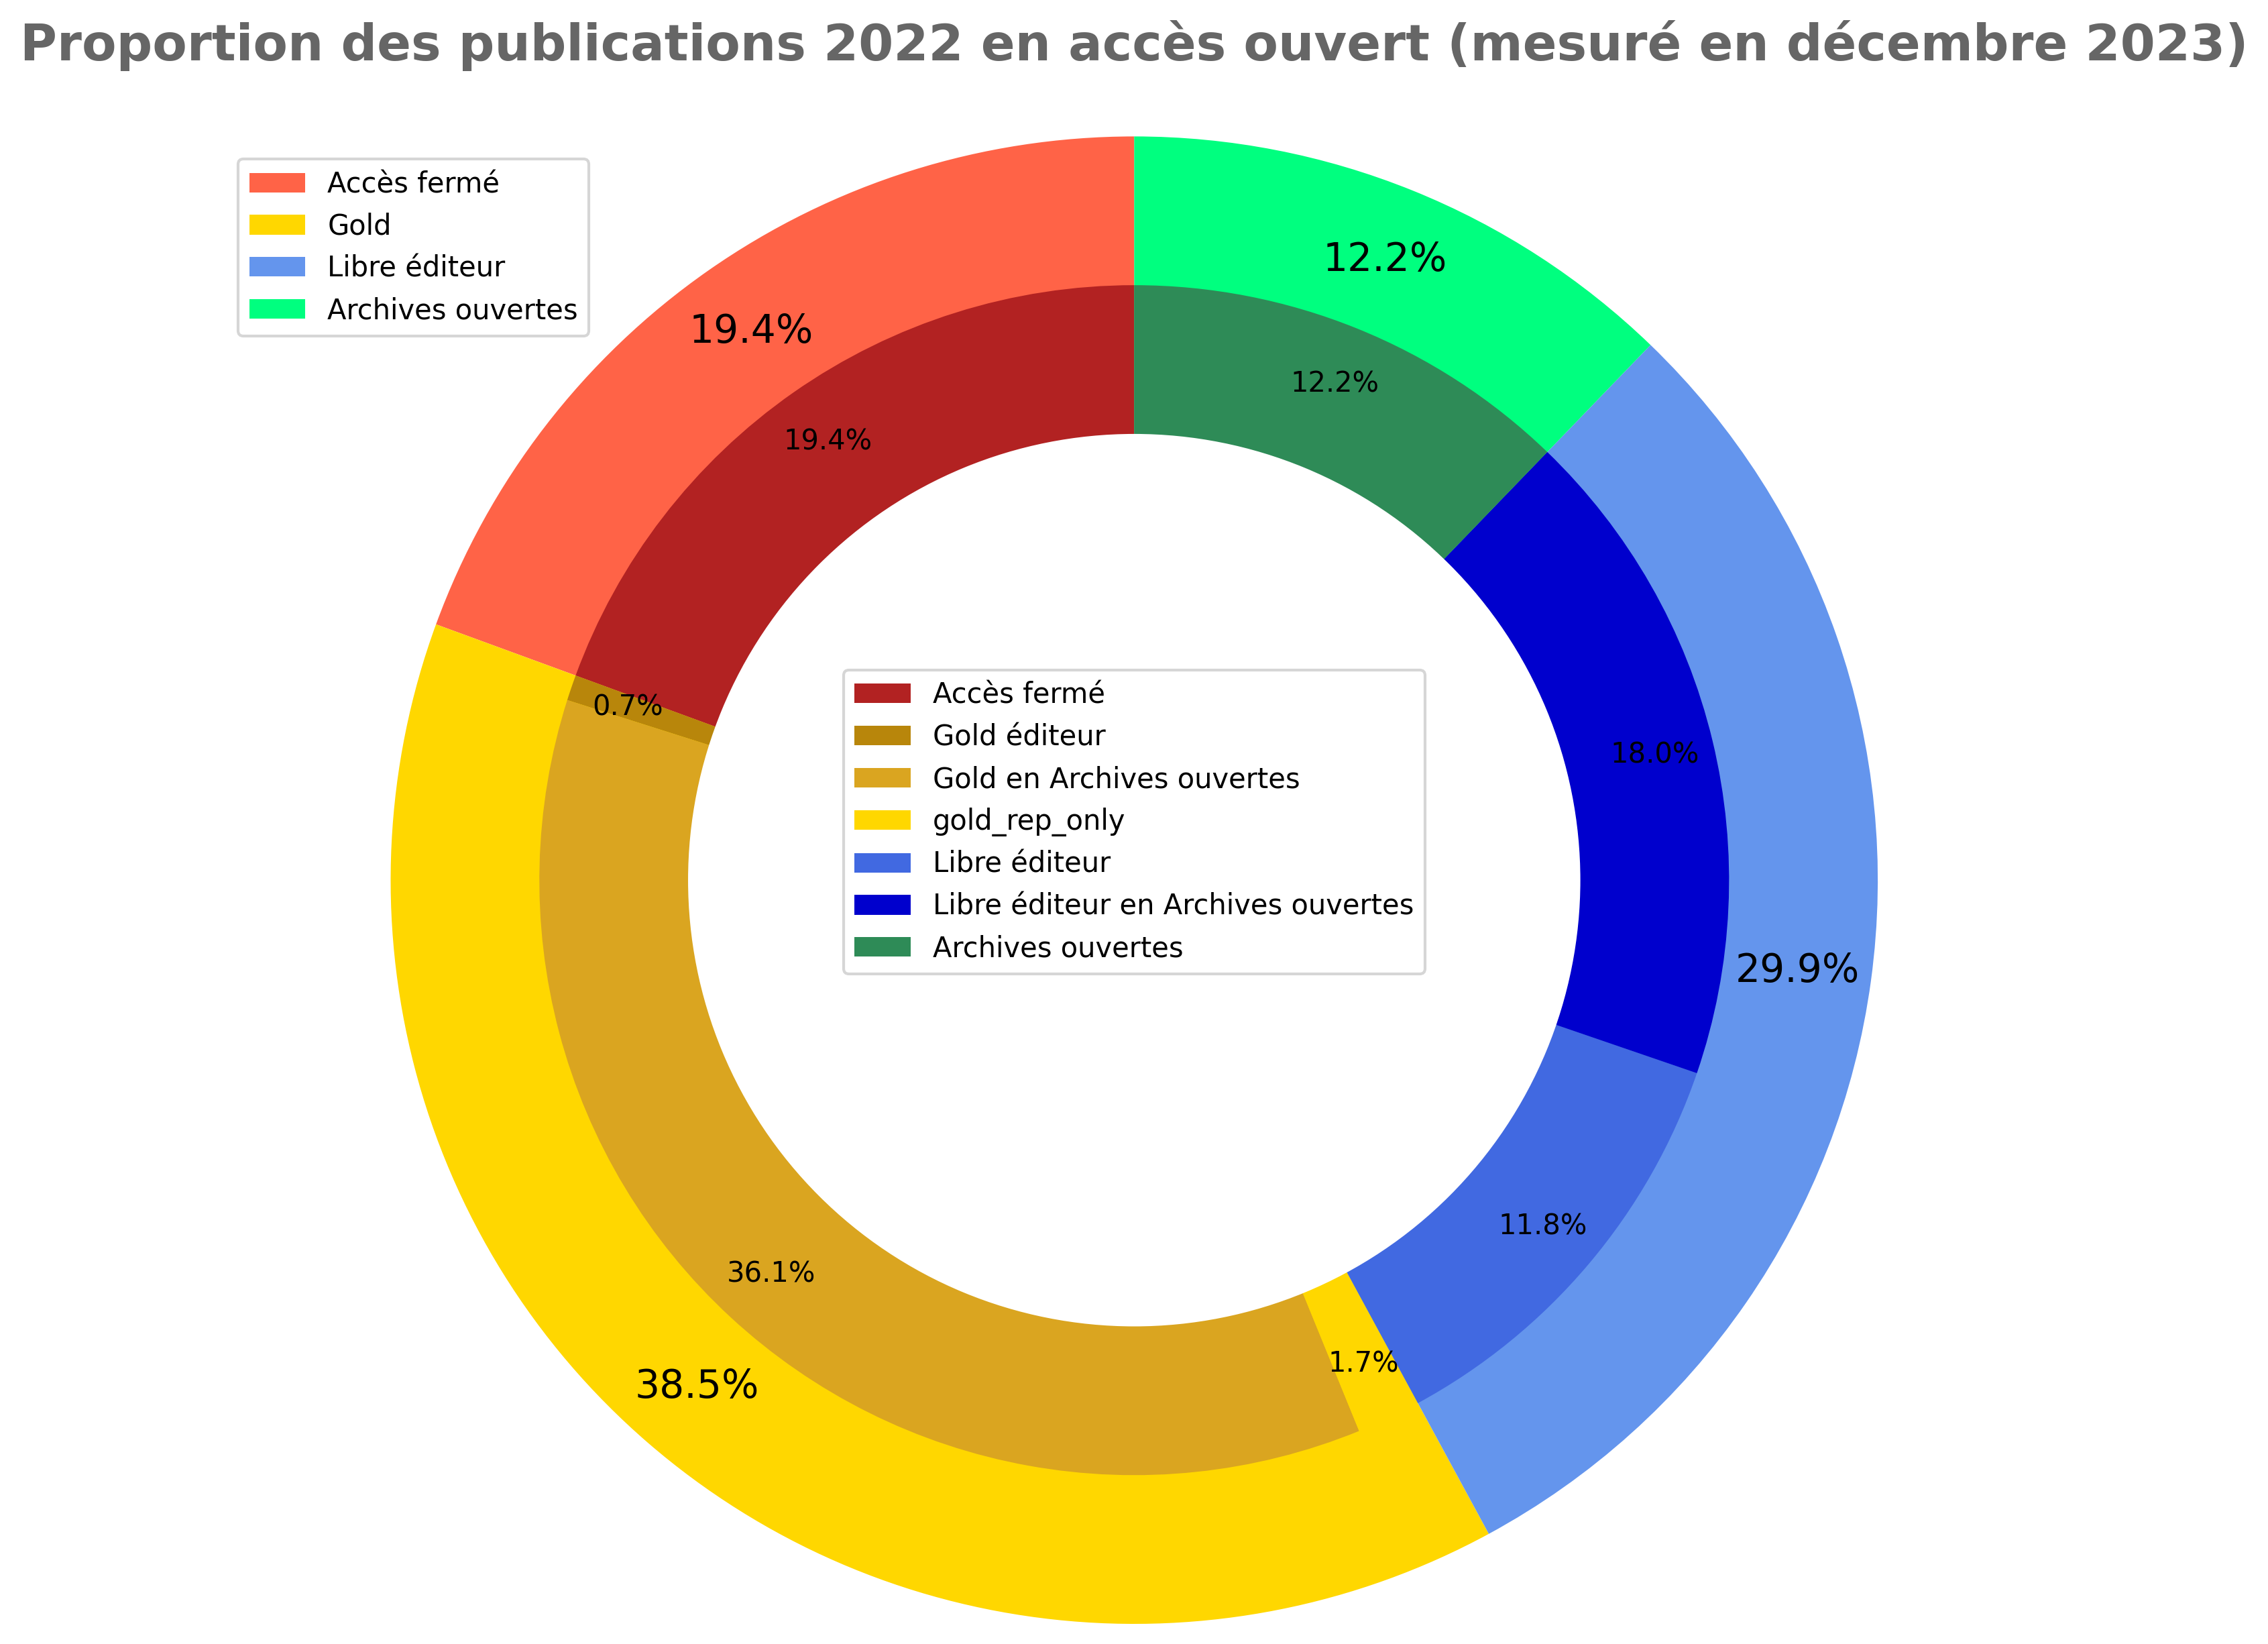

In [36]:
fig, ax = plt.subplots(dpi=300)

# Cercle extérieur
slices_ext, legend_labels_ext, pct_labels_ext = ax.pie(
    pie_data_ext_chiffres,
    radius = 2.5,
    labeldistance = None,
    textprops={"fontsize": 14, "color": "black"},
    colors=[
        "tomato",
        "gold",
        "cornflowerblue",
        "springgreen",        
    ],
    autopct=lambda x: str(round(x, 1)) + "%",
    pctdistance = 0.9,
    startangle = 90,
)

# Cercle intérieur
slices_int, legend_labels_int, pct_labels_int = ax.pie(
    pie_data_int_chiffres,
    radius = 2,
    labeldistance = None,
    colors = [
        "firebrick",
        "darkgoldenrod",
        "goldenrod",
        "gold",
        "royalblue",
        "mediumblue",
        "seagreen",
    ],
    autopct = lambda x: str(round(x, 1)) + "%",
    pctdistance = 0.9,
    startangle = 90,
)

# Cercle blanc intérieur
ax.pie([1], radius=1.5, colors="white")

# Legende extérieur
legende_ext = plt.legend(
    slices_ext,
    pie_data_ext_chiffres.index,
    bbox_to_anchor = (0.1, 1.15),
    loc = "center right",
    bbox_transform = plt.gcf().transFigure,
)
       
# Legende intérieur (la légende est ajoutée à la figure et non au plot, sinon la légende précedente est écrasée)
legende_int = fig.legend(
    slices_int,
    pie_data_int_chiffres.index,
    loc = "center",
)

# Titre
plt.title(
    f"Proportion des publications {annee} en accès ouvert (mesuré en décembre {annee+1})",
    fontsize = 18,
#     x=0.55,
    y = 1.58,
    fontweight = "bold",
    alpha = 0.6,
)

plt.show()

# Exporter l'image
# plt.savefig("Data/outputs/2021_proportion_publications_oa_20211214.png", dpi=150, bbox_inches='tight', pad_inches=0.9)

### Taux d'accès ouvert aux publications 2022 (normalisé)

Isoler l'année à traiter :

In [37]:
publications = df_complete.loc[df_complete['year'] == annee,:]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

#### Type d'accès :

In [38]:
conditionlist = [
    (publications['is_oa'] == False) ,
    (publications['journal_is_in_doaj'] == True),
    ((publications['is_oa'] == True) & (publications['journal_is_in_doaj'] == False) & ((publications['oa_host_type'] == 'publisher') | (publications['oa_host_type'] == 'publisher-repository'))),
    (publications['oa_host_type'] == 'repository') 
    ]
choicelist = ['closed', 'gold', 'free', 'rep']
publications.loc[:, 'depot'] = np.select(conditionlist, choicelist, default='Not Specified')

C:\Users\julien.bacquart\AppData\Local\Temp\ipykernel_31852\85670677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications.loc[:, 'depot'] = np.select(conditionlist, choicelist, default='Not Specified')


In [39]:
pie_publications = publications['depot'].value_counts().sort_index()
pie_publications = pie_publications.rename(
    {
        "closed": "Accès fermé",
        "free": "Libre Editeur",
        "gold": "Gold",
        "rep": "Archive ouverte",
    }
)
pie_publications

depot
Accès fermé        4025
Libre Editeur      6194
Gold               7983
Archive ouverte    2533
Name: count, dtype: int64

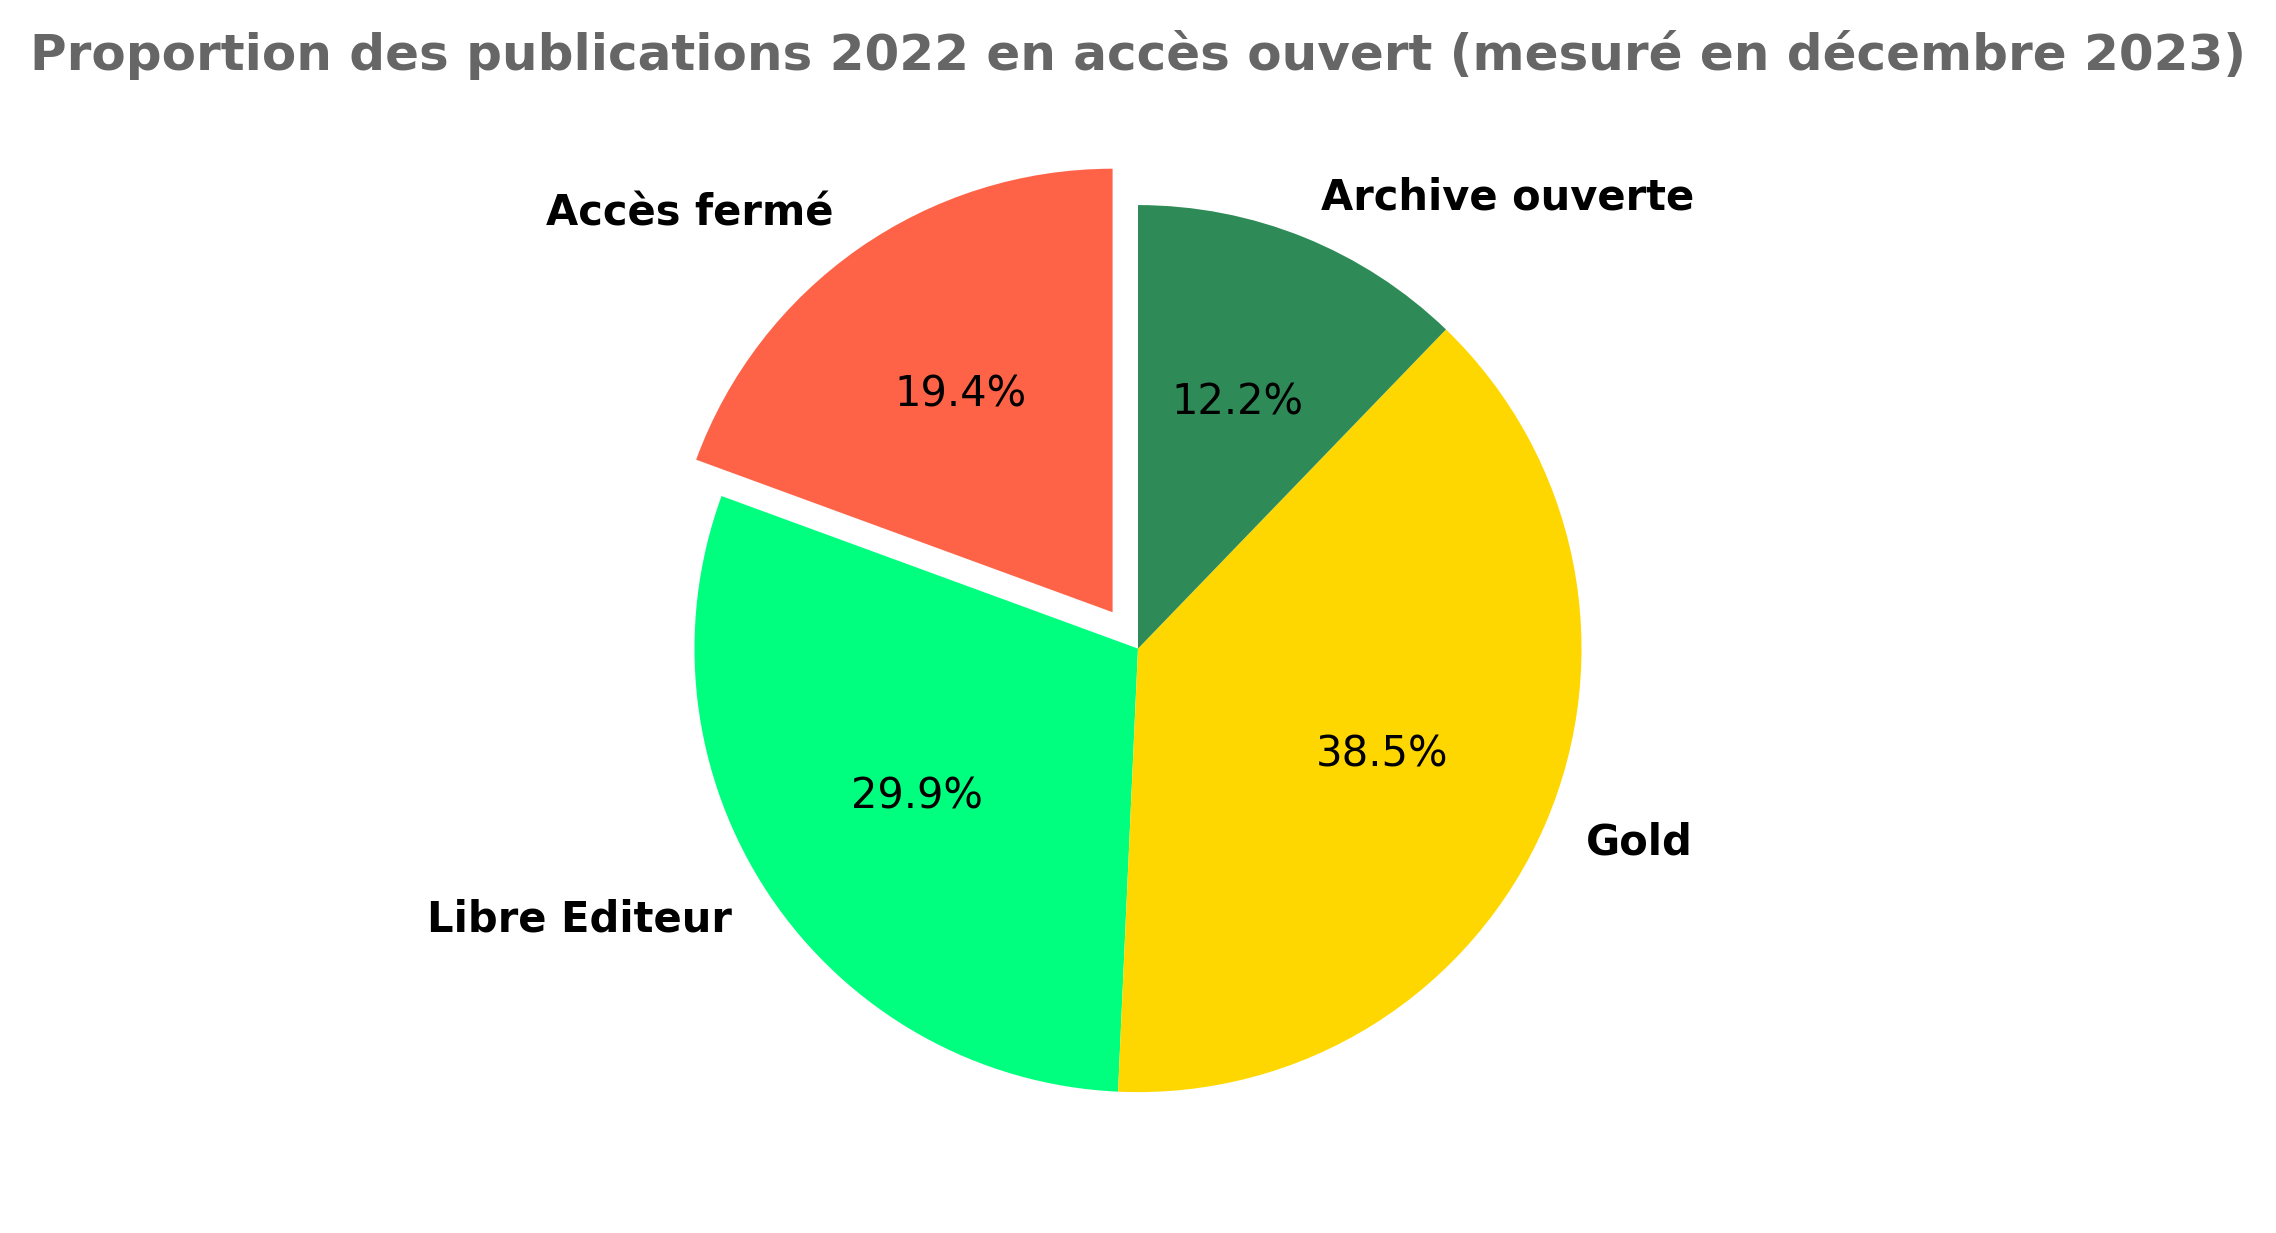

In [40]:
fig, ax = plt.subplots(dpi=300)

# Cercle
slices, legend_labels, pct_labels = ax.pie(
    pie_publications,
    labels = pie_publications.index,
    colors = ["tomato", "springgreen", "gold", "seagreen",],
#     colors = ["tomato", "cornflowerblue", "gold", "springgreen",],
    explode = [0.1, 0, 0, 0],
    autopct = lambda x: str(round(x, 1)) + "%",
    startangle = 90,
#     wedgeprops = {'edgecolor' : 'grey'},
)

# Legend en gras
plt.setp(legend_labels, **{'weight':'bold'})

# Titre
plt.title(
    f"Proportion des publications {annee} en accès ouvert (mesuré en décembre {annee+1})",
    fontsize = 12,
    fontweight = "bold",
    alpha = 0.6,
)

plt.show()

# Exporter l'image
# plt.savefig(f'Data/outputs/{annee}_proportion_publications_oa.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

#### Discipline :

In [41]:
publications_par_domaine = publications['bso_classification'].value_counts().sort_index()
publications_par_domaine

bso_classification
Biology (fond.)                                7176
Chemistry                                       463
Computer and  information sciences              296
Earth, Ecology, Energy and applied biology      270
Engineering                                     537
Humanities                                      291
Mathematics                                      98
Medical research                              11146
Physical sciences, Astronomy                    288
Social sciences                                 170
Name: count, dtype: int64

***Nombre de publications par discipline et type d'accès:***

In [42]:
df_oa_discipline_global_type = pd.crosstab([publications['bso_classification']], publications['depot'])
df_oa_discipline_global_type

depot,closed,free,gold,rep
bso_classification,,,,
Biology (fond.),1020,1964,3304,888
Chemistry,59,106,160,138
Computer and information sciences,44,85,83,84
"Earth, Ecology, Energy and applied biology",23,84,109,54
Engineering,71,146,177,143
Humanities,53,87,92,59
Mathematics,9,27,28,34
Medical research,2661,3578,3890,1017
"Physical sciences, Astronomy",41,66,90,91


Ajout d'une colonne avec le nombre total de publications par discipline:

In [43]:
df_oa_discipline_global_type["Total"] = publications_par_domaine
df_oa_discipline_global_type

depot,closed,free,gold,rep,Total
bso_classification,,,,,
Biology (fond.),1020,1964,3304,888,7176
Chemistry,59,106,160,138,463
Computer and information sciences,44,85,83,84,296
"Earth, Ecology, Energy and applied biology",23,84,109,54,270
Engineering,71,146,177,143,537
Humanities,53,87,92,59,291
Mathematics,9,27,28,34,98
Medical research,2661,3578,3890,1017,11146
"Physical sciences, Astronomy",41,66,90,91,288


In [44]:
df_oa_discipline_global_type.index

Index(['Biology (fond.)', 'Chemistry', 'Computer and  information sciences',
       'Earth, Ecology, Energy and applied biology', 'Engineering',
       'Humanities', 'Mathematics', 'Medical research',
       'Physical sciences, Astronomy', 'Social sciences'],
      dtype='object', name='bso_classification')

Traduction des disciplines en français :

In [45]:
df_oa_discipline_global_type.rename(
    index = {
        "Biology (fond.)": "Biologie (fond.)",
        "Chemistry": "Chimie",
        "Computer and  information sciences": "Informatique",
        "Earth, Ecology, Energy and applied biology": "Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",
        "Engineering": "Sciences de l'Ingénieur",
        "Humanities": "Humanités",
        "Mathematics": "Mathématiques",
        "Medical research": "Sciences médicales",
        "Physical sciences, Astronomy": "Sciences physiques, astronomie",
        "Social sciences": "Sciences sociales",
    },
    inplace = True,
)
df_oa_discipline_global_type

depot,closed,free,gold,rep,Total
bso_classification,,,,,
Biologie (fond.),1020,1964,3304,888,7176
Chimie,59,106,160,138,463
Informatique,44,85,83,84,296
"Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",23,84,109,54,270
Sciences de l'Ingénieur,71,146,177,143,537
Humanités,53,87,92,59,291
Mathématiques,9,27,28,34,98
Sciences médicales,2661,3578,3890,1017,11146
"Sciences physiques, astronomie",41,66,90,91,288


***Nombre de publications par discipline et type d'accès en pourcentage:***

In [46]:
df_oa_discipline_global_type_perc = pd.crosstab([publications['bso_classification']], publications['depot'], normalize = 'index')
df_oa_discipline_global_type_perc

depot,closed,free,gold,rep
bso_classification,,,,
Biology (fond.),0.142140,0.273690,0.460424,0.123746
Chemistry,0.127430,0.228942,0.345572,0.298056
Computer and information sciences,0.148649,0.287162,0.280405,0.283784
"Earth, Ecology, Energy and applied biology",0.085185,0.311111,0.403704,0.200000
Engineering,0.132216,0.271881,0.329609,0.266294
Humanities,0.182131,0.298969,0.316151,0.202749
Mathematics,0.091837,0.275510,0.285714,0.346939
Medical research,0.238740,0.321012,0.349004,0.091243
"Physical sciences, Astronomy",0.142361,0.229167,0.312500,0.315972


Tri par pourcentage de publications en accès fermé croissant:

In [47]:
df_oa_discipline_global_type_perc = df_oa_discipline_global_type_perc.sort_values(by='closed', ascending=True)
df_oa_discipline_global_type_perc

depot,closed,free,gold,rep
bso_classification,,,,
"Earth, Ecology, Energy and applied biology",0.085185,0.311111,0.403704,0.200000
Mathematics,0.091837,0.275510,0.285714,0.346939
Chemistry,0.127430,0.228942,0.345572,0.298056
Engineering,0.132216,0.271881,0.329609,0.266294
Biology (fond.),0.142140,0.273690,0.460424,0.123746
"Physical sciences, Astronomy",0.142361,0.229167,0.312500,0.315972
Computer and information sciences,0.148649,0.287162,0.280405,0.283784
Humanities,0.182131,0.298969,0.316151,0.202749
Medical research,0.238740,0.321012,0.349004,0.091243


Traduction des disciplines en français :

In [48]:
df_oa_discipline_global_type_perc.rename(
    index = {
        "Biology (fond.)": "Biologie (fond.)",
        "Chemistry": "Chimie",
        "Computer and  information sciences": "Informatique",
        "Earth, Ecology, Energy and applied biology": "Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",
        "Engineering": "Sciences de l'Ingénieur",
        "Humanities": "Humanités",
        "Mathematics": "Mathématiques",
        "Medical research": "Sciences médicales",
        "Physical sciences, Astronomy": "Sciences physiques, astronomie",
        "Social sciences": "Sciences sociales",
    },
    inplace = True,
)
df_oa_discipline_global_type_perc

depot,closed,free,gold,rep
bso_classification,,,,
"Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée",0.085185,0.311111,0.403704,0.200000
Mathématiques,0.091837,0.275510,0.285714,0.346939
Chimie,0.127430,0.228942,0.345572,0.298056
Sciences de l'Ingénieur,0.132216,0.271881,0.329609,0.266294
Biologie (fond.),0.142140,0.273690,0.460424,0.123746
"Sciences physiques, astronomie",0.142361,0.229167,0.312500,0.315972
Informatique,0.148649,0.287162,0.280405,0.283784
Humanités,0.182131,0.298969,0.316151,0.202749
Sciences médicales,0.238740,0.321012,0.349004,0.091243


#### Générer le graphique

#### En utilisant Matplotlib

In [49]:
df_oa_discipline_global_type_perc.index

Index(['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée',
       'Mathématiques', 'Chimie', 'Sciences de l'Ingénieur',
       'Biologie (fond.)', 'Sciences physiques, astronomie', 'Informatique',
       'Humanités', 'Sciences médicales', 'Sciences sociales'],
      dtype='object', name='bso_classification')

In [50]:
df_oa_discipline_global_type_perc.index.values

array(['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée',
       'Mathématiques', 'Chimie', "Sciences de l'Ingénieur",
       'Biologie (fond.)', 'Sciences physiques, astronomie',
       'Informatique', 'Humanités', 'Sciences médicales',
       'Sciences sociales'], dtype=object)

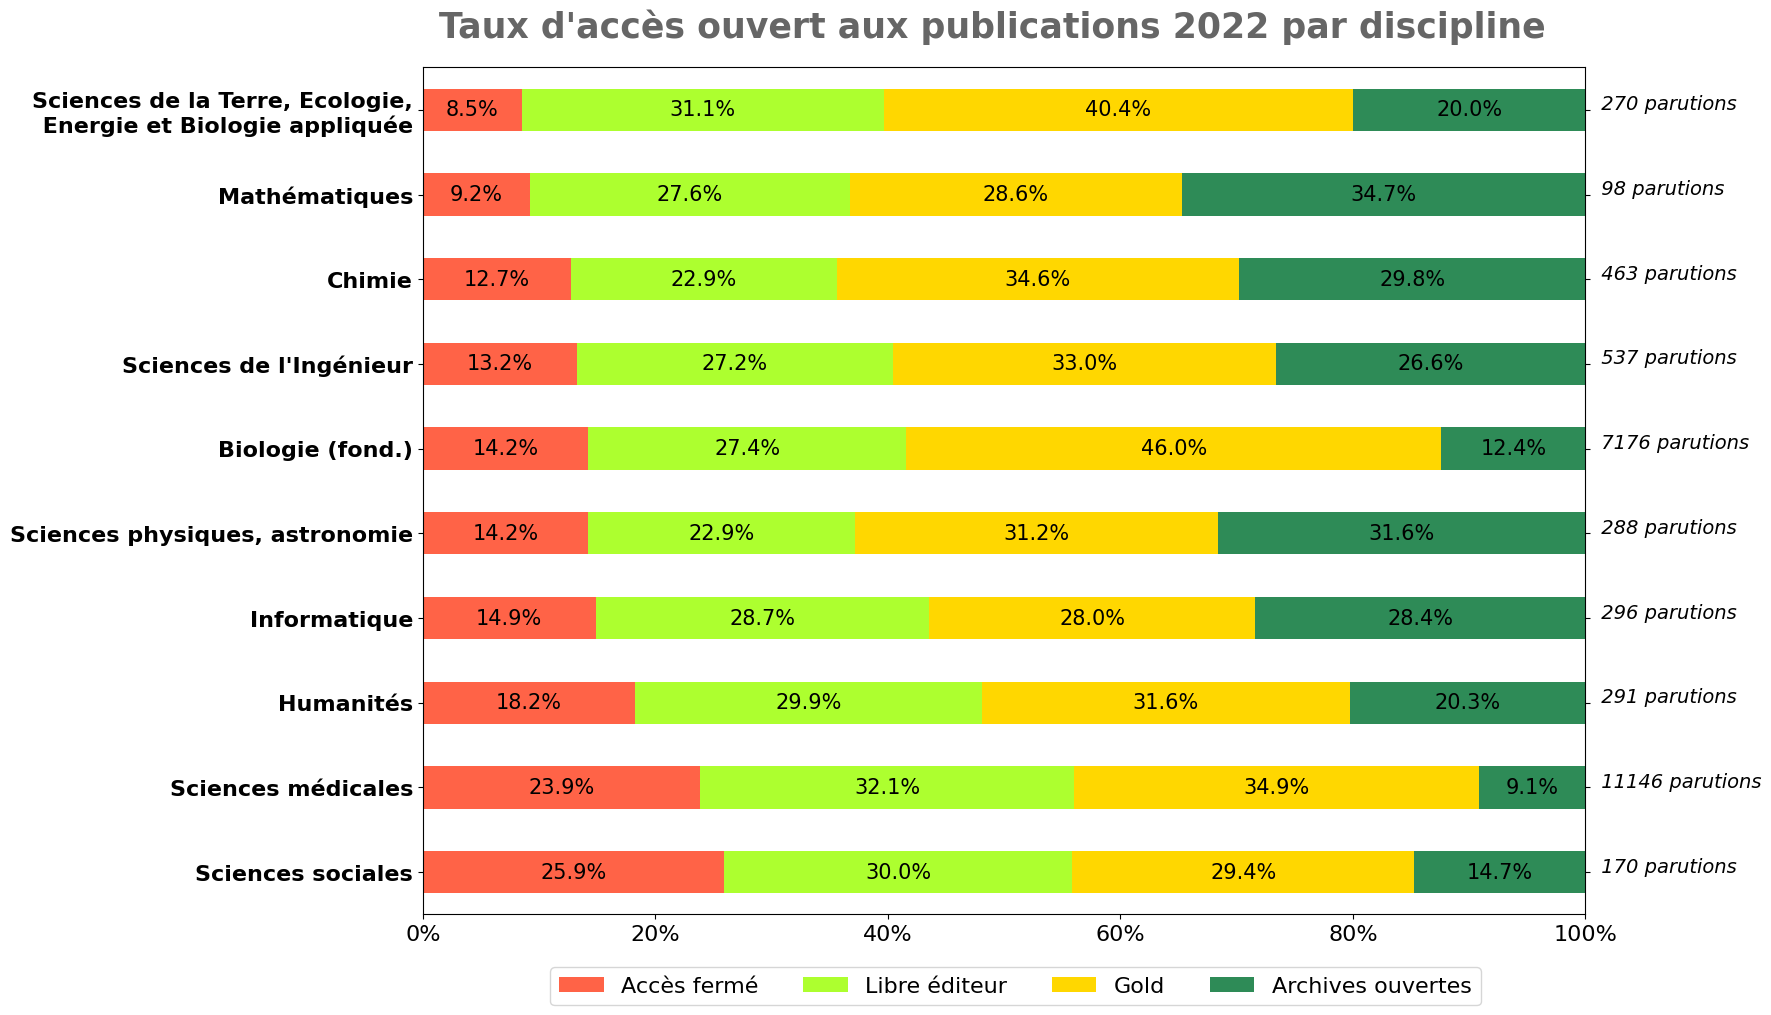

In [51]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_global_type_perc.plot(
    kind="barh",
    stacked=True,
    figsize=(15, 11),
    color=["tomato", "greenyellow", "gold", "seagreen"],
)

ax.invert_yaxis()
ax.set_xlim(xmax=1)

# Affichage des pourcentages
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

labels = []
for j in df_oa_discipline_global_type_perc.columns:
    for i in df_oa_discipline_global_type_perc.index:
        label = f"{df_oa_discipline_global_type_perc.loc[i][j] * 100:.1f}%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# plt.tick_params(axis = 'both', labelsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16, fontweight = "semibold")

# Legendes axe X
# plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)

# Legendes axe Y
plt.ylabel(None, fontsize = 13)

# Enlève le cadre
ax.set_frame_on(False)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème
# temps.
plt.legend(['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
            loc='lower left',
            fontsize = 16,
            ncols=len(df_oa_discipline_global_type_perc.index),
            bbox_to_anchor=(0.1, -0.12),
),

# Nombres de parutions
labels = [item.get_text() for item in ax.get_yticklabels()]
parutions_labels = [f"\n {df_oa_discipline_global_type.loc[label ,'Total']} parutions" for label in labels]

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(
    np.arange(len(parutions_labels)),
    labels = parutions_labels,
    fontsize = 14,
    verticalalignment = 'baseline',
    fontstyle = "oblique"
)

plt.title(f"Taux d'accès ouvert aux publications {annee} par discipline", fontsize = 25, x = 0.49, y = 1.025,
          fontweight = 'bold', alpha = 0.6)

plt.show()
# #plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

#### En utilisant Plotly :

In [52]:
# import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

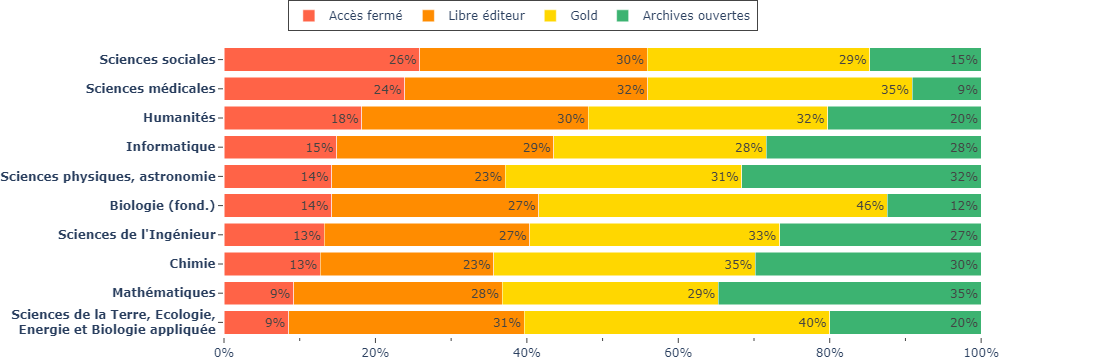

In [83]:
colors = ["tomato", "darkorange", "gold", "mediumseagreen"]
legends = ['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes']

# Le type de publication: ['closed', 'free', 'gold', 'rep']
type_publication_list = df_oa_discipline_global_type_perc.columns.values

# Le domaine de publication: ['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée', 'Mathématiques', ...]
# On 'convertit' la string en string HTML: en remplacant les '\n' par des '<br>' et ajoutant des balises de gras 
domain_publication_list = [domain.replace('\n', '<br>') for domain in df_oa_discipline_global_type_perc.index.values]
domain_publication_list = [f"<b>{domain}</b>" for domain in domain_publication_list]

fig = go.Figure()

# On traverse la DataFrame 'verticalement' par type de publications: ['closed', 'free', 'gold', 'rep']
for i, type_publi in enumerate(type_publication_list):
    
    # En X on a la valeur en pourcentages [0.08518519, 0.09183673469387756, 0.12742980561555076 ... ]
    x_list = df_oa_discipline_global_type_perc.loc[:, type_publi].values

    # En Y  on a le domaine de publication['Sciences de la Terre, Ecologie,\n Energie et Biologie appliquée', 'Mathématiques', ...]
    y_list = domain_publication_list

    # Infos supplémentaires: (nombre de publications pour ce type de publications, nombre total de publications pour ce domaine)
    # On utilise le même index, pour être sûr que les données sont alignés
    index = df_oa_discipline_global_type_perc.index
    custom_data  = np.stack([df_oa_discipline_global_type.loc[index, type_publi].values, df_oa_discipline_global_type.loc[index, "Total"].values], axis = -1)
    
    fig.add_trace(go.Bar(
        x = x_list,
        y = y_list,
        orientation = 'h',
        marker = dict(
            color = colors[i],
        ),
        
        # La légende
        name = legends[i], # ['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes']

        # Infos supplémentaires: (nombre de publications pour ce type de publications, nombre total de publications pour ce domaine)
        customdata = custom_data,
        
        # L'affichage des infos supplémentaires au survol de la barre
        hovertemplate = '<b>%{y}</b>: %{customdata[1]} publications<br>' + f'<b>{legends[i]}</b>' + ': %{customdata[0]} publications (%{x})<extra></extra>',
        hoverlabel = dict(bgcolor ='#FFF'), # couleur de fond de la bulle

        # L'annotation du pourcentage sur la barre
        text = x_list,
        texttemplate= '%{text:.0%}',
        textposition= 'inside',
    
    ))

fig.update_layout(
    barmode='stack',
    template = "plotly_white",
    height = 450,
    # X-axis
    xaxis=dict(
        title_text = None,
        fixedrange = True,
        ticks = "outside",
        minor_ticks="outside",
        minor = dict(nticks=2), # Graduations tous les 10%
        tickformat = '.0%',
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    # Y-axis
    yaxis=dict(
        title_text= None,
        fixedrange = True,
        ticks = "outside",
        showgrid=False,
        zeroline=False,
        showline=False,
    ),
    # Legend
    showlegend= True,
    legend_title = None,
    legend = dict(
        orientation="h",
        traceorder = 'normal',
        yanchor = "middle",
        y= 1.10,
        xanchor= "center",
        x= 0.375,
        borderwidth=1
    ),
    # Margins
    margin=dict(t=0, b=0),
)

fig.show()

##### Export vers une iframe :

On exporte le graphique généré par Plotly vers un fichier hmtl, qui peut ensuite être facilement intégré dans une page web via une iframe.

In [84]:
plotly_output_filename = f'./Data/outputs/{annee + 2}_proportion_oa_par_discipline_plotly.html'

# Export Plotly figure to hmtl file
fig.write_html(
    plotly_output_filename, 
    include_plotlyjs='cdn',
)

print(f'> Fichier généré: {plotly_output_filename}')

> Fichier généré: ./Data/outputs/2024_proportion_oa_par_discipline_plotly.html


### Taux d'accès ouvert aux publications 2022 (non-normalisé)

#### En utilisant Matplotlib

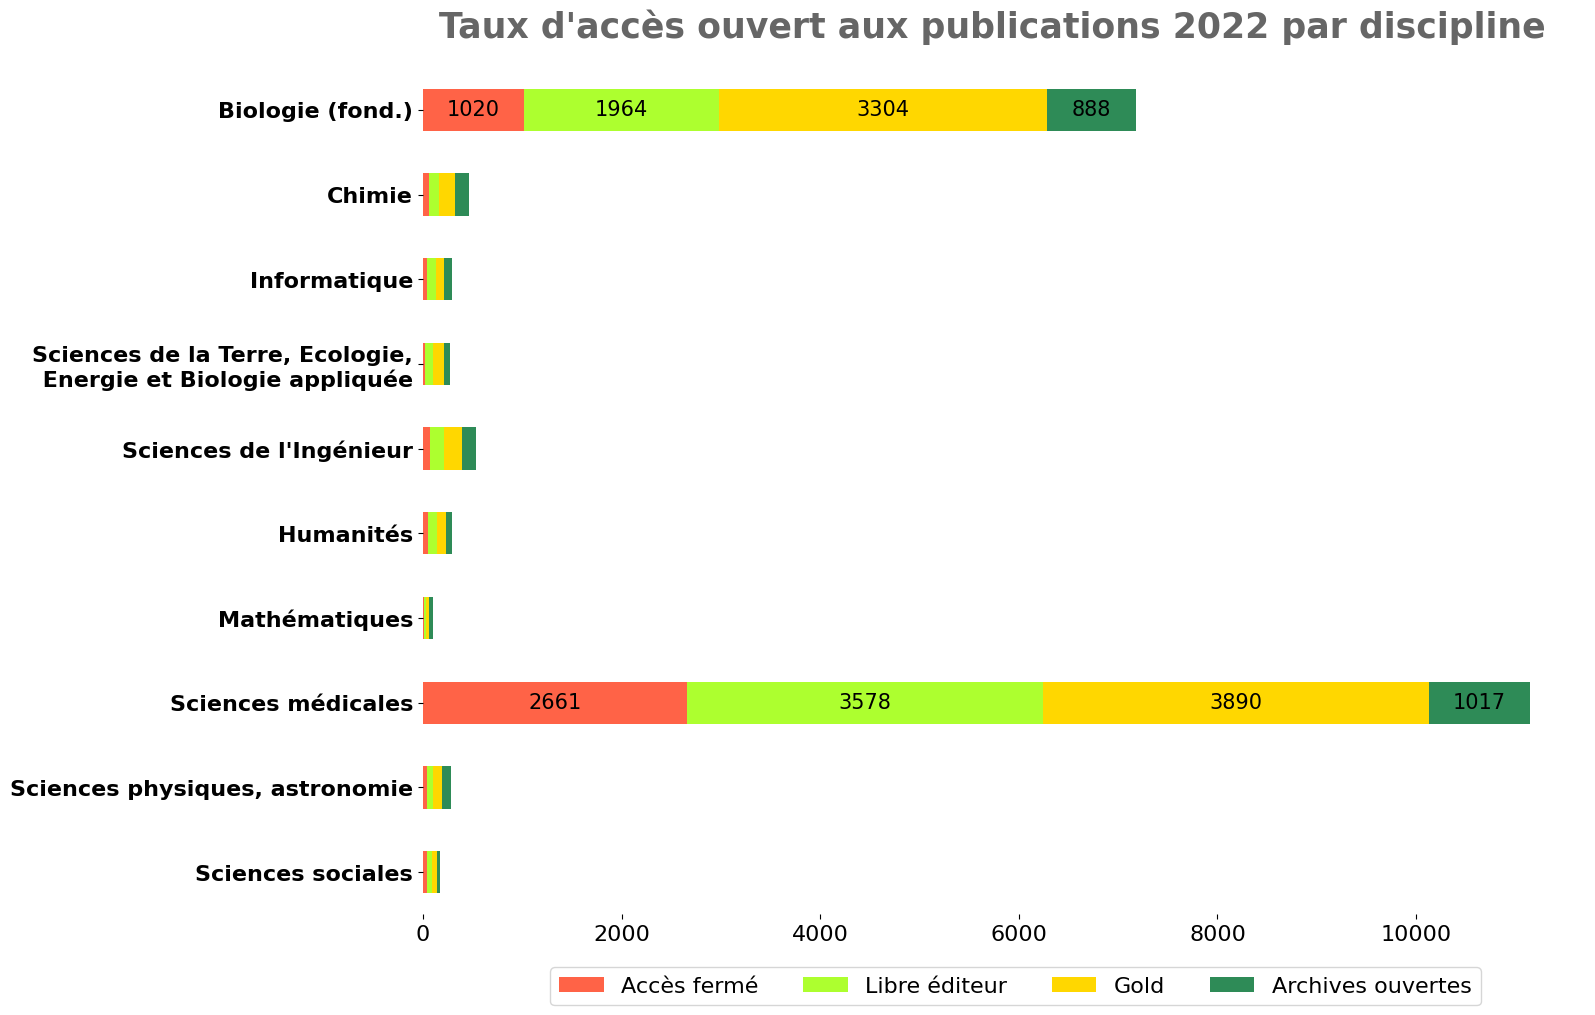

In [55]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_global_type.drop(["Total"], axis=1).plot(
    kind="barh",
    stacked=True,
    figsize=(15, 11),
    color=["tomato", "greenyellow", "gold", "seagreen"],
)

ax.invert_yaxis()

labels = []
for j in df_oa_discipline_global_type.columns:
    for i in df_oa_discipline_global_type.index:
        label = f"{df_oa_discipline_global_type.loc[i][j]}"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 750:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# plt.tick_params(axis = 'both', labelsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16, fontweight = "semibold")

# Legendes axe X
# plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)

# Legendes axe Y
plt.ylabel(None, fontsize = 13)

# Enlève le cadre
ax.set_frame_on(False)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème
# temps.
plt.legend(['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
            loc='lower left',
            fontsize = 16,
            ncols=len(df_oa_discipline_global_type_perc.index),
            bbox_to_anchor=(0.1, -0.12),
),

plt.title(f"Taux d'accès ouvert aux publications {annee} par discipline", fontsize = 25, x = 0.49, y = 1.025,
          fontweight = 'bold', alpha = 0.6)

plt.show()
# #plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### Evolution des frais de publications (APC)

Les données ont majoritairement été extraites de la plateformes OpenAPC mais une partie des sources sont internes à l'Institut. Pour autant, l'Inserm met à disposition cette portion de code, à toutes fins utiles.

In [56]:
open_APC_df = pd.read_csv("Data/raw/open_apc_inserm_15-19.csv")

In [57]:
all_graph_data_df = open_APC_df.sort_values(['period','is_hybrid','euro'],ascending=False)
graph_data_df = all_graph_data_df[['period','is_hybrid','euro']]

In [58]:
graph_data_df

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [59]:
graph_data_gold = graph_data_df.loc[graph_data_df['is_hybrid'] == False,:]

In [60]:
graph_data_gold

,period,is_hybrid,euro
1635,2019,False,5148.00
1622,2019,False,4500.00
1657,2019,False,4480.00
1948,2019,False,4480.00
2015,2019,False,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [61]:
graph_data_gold_2019 = graph_data_gold.loc[graph_data_gold['period'] == 2019.0,:]
somme_gold_2019 = graph_data_gold_2019['euro'].sum()

In [62]:
somme_gold_2019

1105484.3

In [63]:
graph_data_gold_2018 = graph_data_gold.loc[graph_data_gold['period'] == 2018.0,:]
somme_gold_2018 = graph_data_gold_2018['euro'].sum()

In [64]:
somme_gold_2018

781361.5700000001

In [65]:
graph_data_gold_2017 = graph_data_gold.loc[graph_data_gold['period'] == 2017.0,:]
somme_gold_2017 = graph_data_gold_2017['euro'].sum()

In [66]:
somme_gold_2017

1042570.37

In [67]:
graph_data_gold_2015 = graph_data_gold.loc[graph_data_gold['period'] == 2015.0,:]
somme_gold_2015 = graph_data_gold_2015['euro'].sum()

In [68]:
somme_gold_2015

645550.9400000001

In [69]:
graph_data_hybrid = graph_data_df.loc[graph_data_df['is_hybrid'] == True,:]

In [70]:
graph_data_hybrid

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
446,2015,True,741.00
447,2015,True,734.00
458,2015,True,536.90
461,2015,True,450.00


In [71]:
graph_data_hybrid_2019 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2019.0,:]
somme_hybrid_2019 = graph_data_hybrid_2019['euro'].sum()

In [72]:
somme_hybrid_2019

158720.41999999998

In [73]:
graph_data_hybrid_2018 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2018.0,:]
somme_hybrid_2018 = graph_data_hybrid_2018['euro'].sum()

In [74]:
somme_hybrid_2018

141293.34

In [75]:
graph_data_hybrid_2017 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2017.0,:]
somme_hybrid_2017 = graph_data_hybrid_2017['euro'].sum()

In [76]:
somme_hybrid_2017

166908.78

In [77]:
graph_data_hybrid_2015 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2015.0,:]
somme_hybrid_2015 = graph_data_hybrid_2015['euro'].sum()

In [78]:
somme_hybrid_2015

172639.52000000002

C:\Users\julien.bacquart\AppData\Local\Temp\ipykernel_31852\4222670905.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



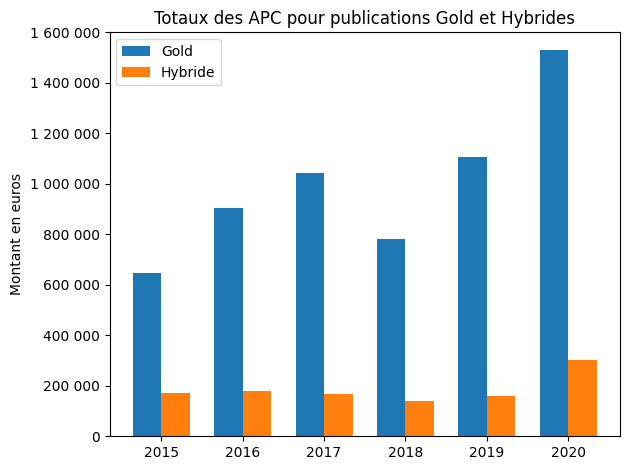

In [79]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['2015', '2016', '2017', '2018', '2019', '2020']
gold = [somme_gold_2015, 902802, somme_gold_2017, somme_gold_2018, somme_gold_2019, 1529664]
hybrid = [somme_hybrid_2015, 179945, somme_hybrid_2017, somme_hybrid_2018, somme_hybrid_2019, 303541]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gold, width, label='Gold')
rects2 = ax.bar(x + width/2, hybrid, width, label='Hybride')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Montant en euros')
ax.set_title('Totaux des APC pour publications Gold et Hybrides')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1600000)
ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

#plt.show()

#plt.savefig('./Totaux_APC_Gold_Hybride_20211110.png', dpi=100, bbox_inches='tight', pad_inches=0.9)